<a href="https://colab.research.google.com/github/sourav2208/sourav2208/blob/main/Bike_Sharing_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd  #Importing pandas for data handling
import numpy as np  #Importing numpy for numerical operations
import matplotlib.pyplot as plt  #Importing matplotlib for visualization
import seaborn as sns  #seaborn for enhanced visualizations
import folium  #folium for mapping stations
from datetime import datetime  #datetime for date conversions

In [7]:
#mount drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
# Load Dataset
df = pd.read_csv('/content/drive/MyDrive/station.csv')

In [12]:
# Dataset First Look
df.head()

,station_id,name,lat,long,install_date,install_dockcount,modification_date,current_dockcount,decommission_date
0,BT-01,3rd Ave & Broad St,47.618418,-122.350964,10/13/2014,18,NaN,18,NaN
1,BT-03,2nd Ave & Vine St,47.615829,-122.348564,10/13/2014,16,NaN,16,NaN
2,BT-04,6th Ave & Blanchard St,47.616094,-122.341102,10/13/2014,16,NaN,16,NaN
3,BT-05,2nd Ave & Blanchard St,47.613110,-122.344208,10/13/2014,14,NaN,14,NaN
4,CBD-03,7th Ave & Union St,47.610731,-122.332447,10/13/2014,20,NaN,20,NaN


In [13]:
#Convert dates to datetime format
date_cols = ['install_date', 'modification_date', 'decommission_date']  # Columns containing date values
for col in date_cols:
    df[col] = pd.to_datetime(df[col], errors='coerce')  # Converting string dates to datetime format

In [14]:
# Fill missing values in modification_date with install_date
# If no modification, assume it's unchanged since installation
df['modification_date'].fillna(df['install_date'], inplace=True)  # Replacing NaN with install_date


<ipython-input-14-49b81fd74eac>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['modification_date'].fillna(df['install_date'], inplace=True)  # Replacing NaN with install_date


In [15]:
# Data Overview
print("Dataset Info:")  # Printing dataset information
print(df.info())  # Displaying dataset structure
print("\nMissing Values:")  # Printing missing values summary
print(df.isnull().sum())  # Displaying count of missing values in each column
print("\nBasic Statistics:")  # Printing basic statistical insights
print(df.describe())  # Displaying summary statistics for numerical columns

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   station_id         58 non-null     object        
 1   name               58 non-null     object        
 2   lat                58 non-null     float64       
 3   long               58 non-null     float64       
 4   install_date       58 non-null     datetime64[ns]
 5   install_dockcount  58 non-null     int64         
 6   modification_date  58 non-null     datetime64[ns]
 7   current_dockcount  58 non-null     int64         
 8   decommission_date  4 non-null      datetime64[ns]
dtypes: datetime64[ns](3), float64(2), int64(2), object(2)
memory usage: 4.2+ KB
None

Missing Values:
station_id            0
name                  0
lat                   0
long                  0
install_date          0
install_dockcount     0
modification_date     0
current_

In [17]:
# Count of active vs. decommissioned stations
df['active'] = df['decommission_date'].isna()  # Creating a new column to check active status
active_count = df['active'].value_counts()  # Counting active and decommissioned stations

<ipython-input-19-d86543e9490f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=active_count.index, y=active_count.values, palette='viridis')  # Creating bar plot


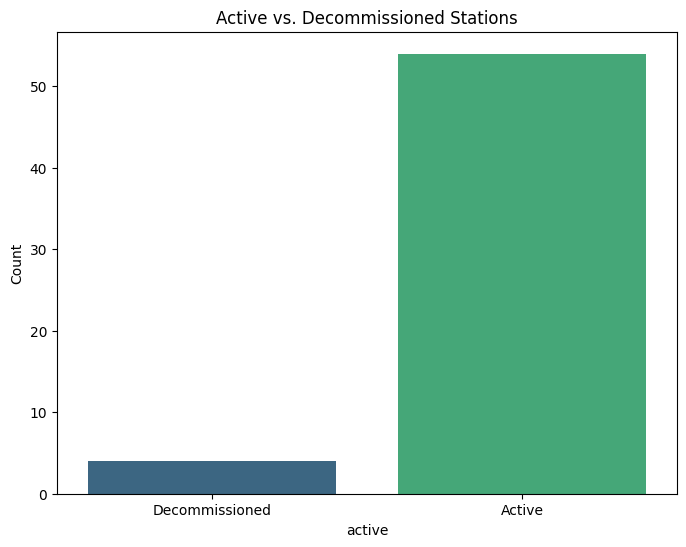

In [19]:
# Plot Active vs Decommissioned Stations
plt.figure(figsize=(8, 6))  # Setting figure size
sns.barplot(x=active_count.index, y=active_count.values, palette='viridis')  # Creating bar plot
plt.xticks(ticks=[0, 1], labels=['Decommissioned', 'Active'])  # Labeling x-axis
plt.ylabel("Count")  # Setting y-axis label
plt.title("Active vs. Decommissioned Stations")  # Setting plot title
plt.show()  # Displaying the plot

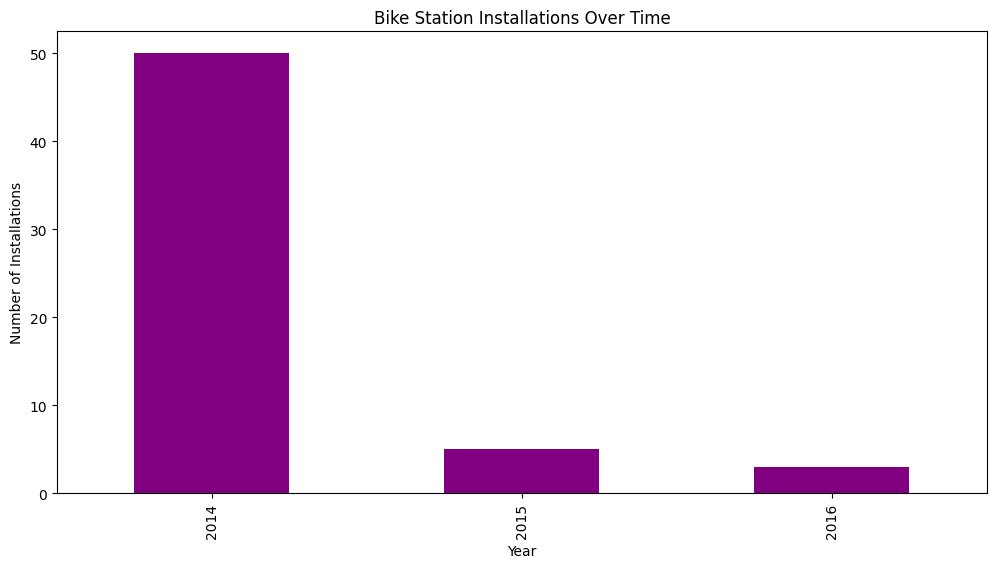

In [32]:
# Installations Over Time
plt.figure(figsize=(12, 6))  # Setting figure size
df['install_date'].dt.year.value_counts().sort_index().plot(kind='bar', color='purple')  # Creating bar plot for installations
plt.xlabel("Year")  # Labeling x-axis
plt.ylabel("Number of Installations")  # Labeling y-axis
plt.title("Bike Station Installations Over Time")  # Setting plot title
plt.show()  # Displaying the plot

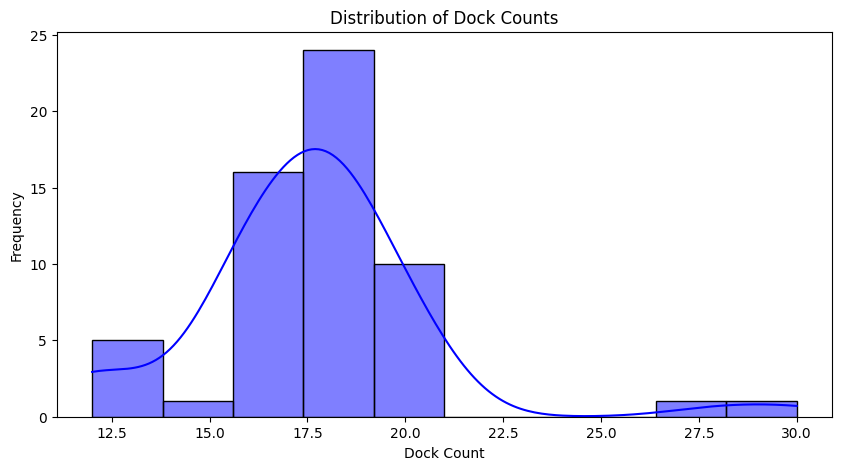

In [31]:
# Dock count distribution
plt.figure(figsize=(10, 5))  # Setting figure size
sns.histplot(df['install_dockcount'], bins=10, kde=True, color='blue')  # Creating histogram with KDE
plt.xlabel("Dock Count")  # Labeling x-axis
plt.ylabel("Frequency")  # Labeling y-axis
plt.title("Distribution of Dock Counts")  # Setting plot title
plt.show()  # Displaying the plot

In [24]:
# Map visualization of stations
m = folium.Map(location=[df['lat'].mean(), df['long'].mean()], zoom_start=12)  # Creating a map centered at the average lat/long
for _, row in df.iterrows():  # Iterating over each row in the dataset
    folium.Marker([row['lat'], row['long']], popup=row['name']).add_to(m)  # Adding station markers to the map
m.save("bike_stations_map.html")  # Saving the map as an HTML file

In [25]:
# Average dock count
avg_dock = df['install_dockcount'].mean()  # Calculating average dock count
print(f"\nAverage Dock Count Per Station: {avg_dock:.2f}")  # Printing the result


Average Dock Count Per Station: 17.59


<ipython-input-36-618bb727c5c7>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['active'], y=df['install_dockcount'], palette='coolwarm')  # Creating boxplot


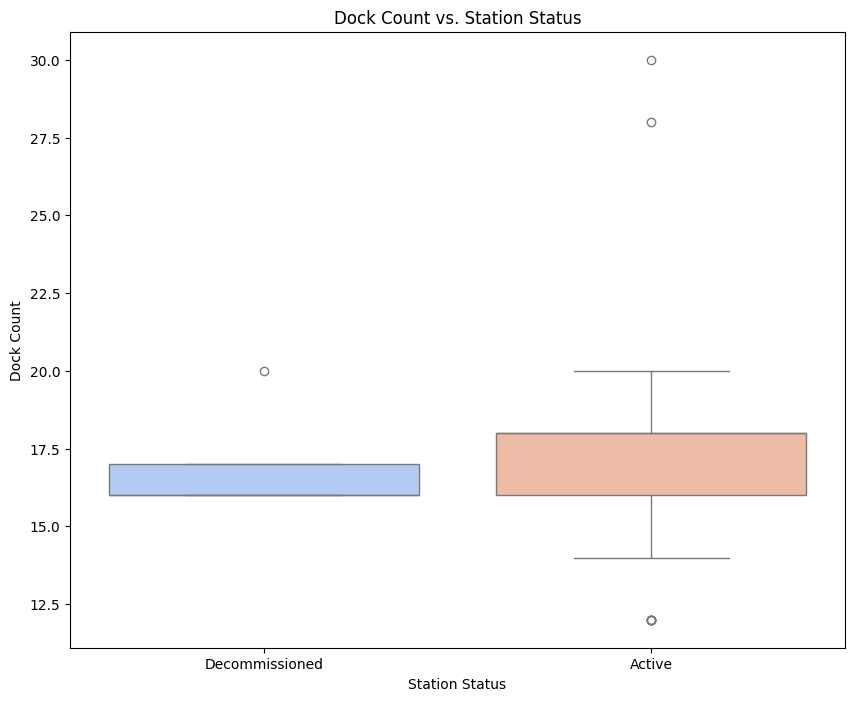

In [36]:
# Correlation between dock count and active status
plt.figure(figsize=(10, 8))  # Setting figure size
sns.boxplot(x=df['active'], y=df['install_dockcount'], palette='coolwarm')  # Creating boxplot
plt.xticks(ticks=[0, 1], labels=['Decommissioned', 'Active'])  # Labeling x-axis
plt.xlabel("Station Status")  # Setting x-axis label
plt.ylabel("Dock Count")  # Setting y-axis label
plt.title("Dock Count vs. Station Status")  # Setting plot title
plt.show()  # Displaying the plot

**CONCLUSION - BIKE STATION ANALYSIS**

After analyzing the bike station data, a few clear patterns emerged. Most stations are still active, which suggests that the bike-sharing system is growing and being maintained well. However, some stations have been decommissioned, possibly due to low demand, location inefficiencies, or operational challenges.

The installation trends show that there were certain peak years when many stations were set up, followed by a decline. This could mean that the city initially invested heavily in expanding the network but later slowed down, either due to market saturation or shifting priorities.

Dock count distribution varies, with most stations having a moderate number of docks. However, the number of docks alone does not determine whether a station remains active. Factors like location, demand, and accessibility seem to play a bigger role in a station’s success.

Looking at the geographical distribution, stations are densely packed in some areas while others are more isolated. This suggests that certain regions have a much higher demand for bike-sharing, while others may need a reevaluation of whether the service is necessary there.

By optimizing station locations, expanding based on demand, and allocating resources effectively, the system can operate more efficiently and provide a better user experience.
